In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Abdelrahman/Documents/Machine Learning/linear regression/08-Linear-Regression-Models/Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
x = df.drop('sales',axis=1)

In [5]:
y = df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
poly_converter = PolynomialFeatures(degree=2,include_bias=False)

In [8]:
poly_feature = poly_converter.fit_transform(x)

In [9]:
poly_feature.shape

(200, 9)

In [10]:
x.shape

(200, 3)

In [11]:
x.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [12]:
print(poly_feature[0])
print(len(poly_feature[0]))

[2.301000e+02 3.780000e+01 6.920000e+01 5.294601e+04 8.697780e+03
 1.592292e+04 1.428840e+03 2.615760e+03 4.788640e+03]
9


In [16]:
poly_feature[0][0:3]

array([230.1,  37.8,  69.2])

In [17]:
poly_feature[0][:3]**2

array([52946.01,  1428.84,  4788.64])

In [18]:
#interaction term
230.1*37.8

8697.779999999999

In [19]:
230.1*69.2

15922.92

In [20]:
37.8*69.2

2615.7599999999998

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(poly_feature,y,test_size=0.3,random_state=101)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
poly_model = LinearRegression(fit_intercept=True)

In [27]:
poly_model.fit(x_train,y_train)

LinearRegression()

In [28]:
y_prediction = poly_model.predict(x_test)

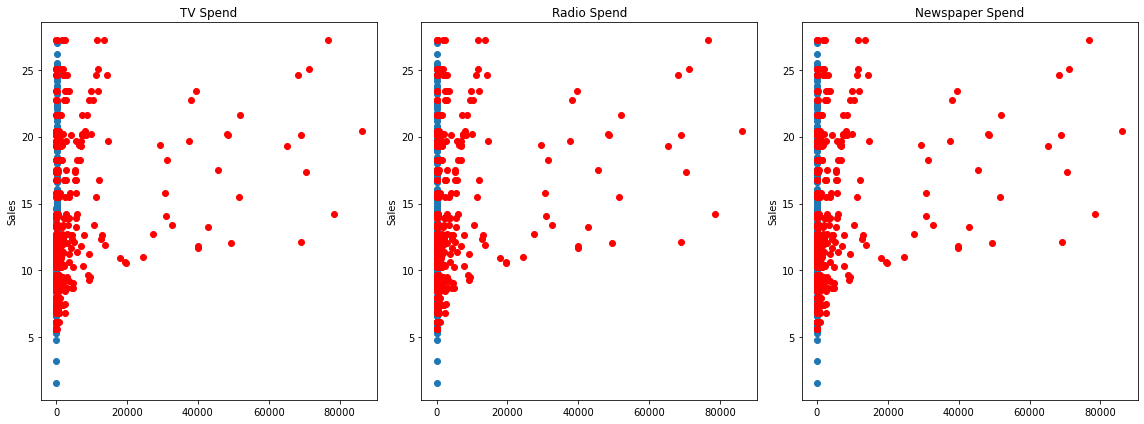

In [29]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(x_test,y_prediction,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")


axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(x_test,y_prediction,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(x_test,y_prediction,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();
plt.show()

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
mae = mean_absolute_error(y_test,y_prediction)
mse = mean_squared_error(y_test,y_prediction)
rmse = np.sqrt(mse)

In [32]:
mae

0.48967980448037

In [33]:
mse

0.4417505510403648